In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


## Dataset

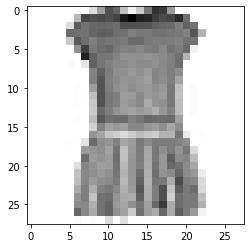

In [17]:
# Load Data
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Normalise pixel values, to be between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

# These are the names of the classes
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Plot an image from the training set
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.show()

## Model

In [18]:
model = keras.Sequential()
model.add(keras.layers.Reshape((28,28,1),input_shape=(28,28)))
model.add(keras.layers.Conv2D(34, kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(22, kernel_size=(3,3)))
model.add(keras.layers.Conv2D(12, kernel_size=(3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(95, activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(24, activation='relu'))
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(optimizer=keras.optimizers.Adam(lr=0.000212),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 34)        340       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 34)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 22)        6754      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 12)          2388      
_________________________________________________________________
flatten_2 (Flatten)          (None, 972)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 972)              

### Train

In [50]:
# I have already trained this model for epochs
# Move down to the next cell to load the pretrained model
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=30)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3557 - accuracy: 0.5148 - val_loss: 0.5558 - val_accuracy: 0.8002
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6805 - accuracy: 0.7588 - val_loss: 0.4905 - val_accuracy: 0.8221
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5849 - accuracy: 0.7893 - val_loss: 0.4374 - val_accuracy: 0.8398
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5276 - accuracy: 0.8145 - val_loss: 0.3996 - val_accuracy: 0.8545
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4781 - accuracy: 0.8345 - val_loss: 0.3908 - val_accuracy: 0.8612
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4615 - accuracy: 0.8390 - val_loss: 0.3821 - val_accuracy: 0.8631
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4440 - accuracy: 0.8477 - val_loss: 0.3625 - val_ac

In [ ]:
# Plot train & test accuracy against number of epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Number of epochs')
plt.legend(loc="lower right")
plt.show()

### Load Model

In [76]:
# Load Saved Model
model = keras.models.load_model('FashionMNIST-saved-model.h5')

## Predict

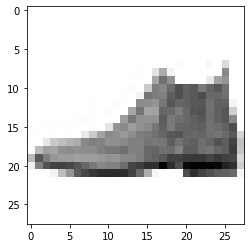

Actual : Ankle boot
Predicted : Ankle boot


In [48]:
# Index of Test set, to predict
N = 0 

# Plot the test set image of index N
plt.imshow(test_images[N],cmap=plt.cm.binary)
plt.show()

# Label on the test set
print("Actual :", class_names[test_labels[N]])

# Predict Test set image
prediction = model.predict(test_images)

# The predicted class is a probability distribution
# So we take the index of the highest probability by np.argmax
# and pass it to the class_names
highest_probability = np.argmax(prediction[N])
predicted = class_names[prediction_index]
print("Predicted :", predicted)